In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import os
from PIL import Image
import json
import cv2

In [2]:
TRAIN_IMAGES_PATH = 'train/image/'
TRAIN_ANNO_PATH = 'train/annos/'

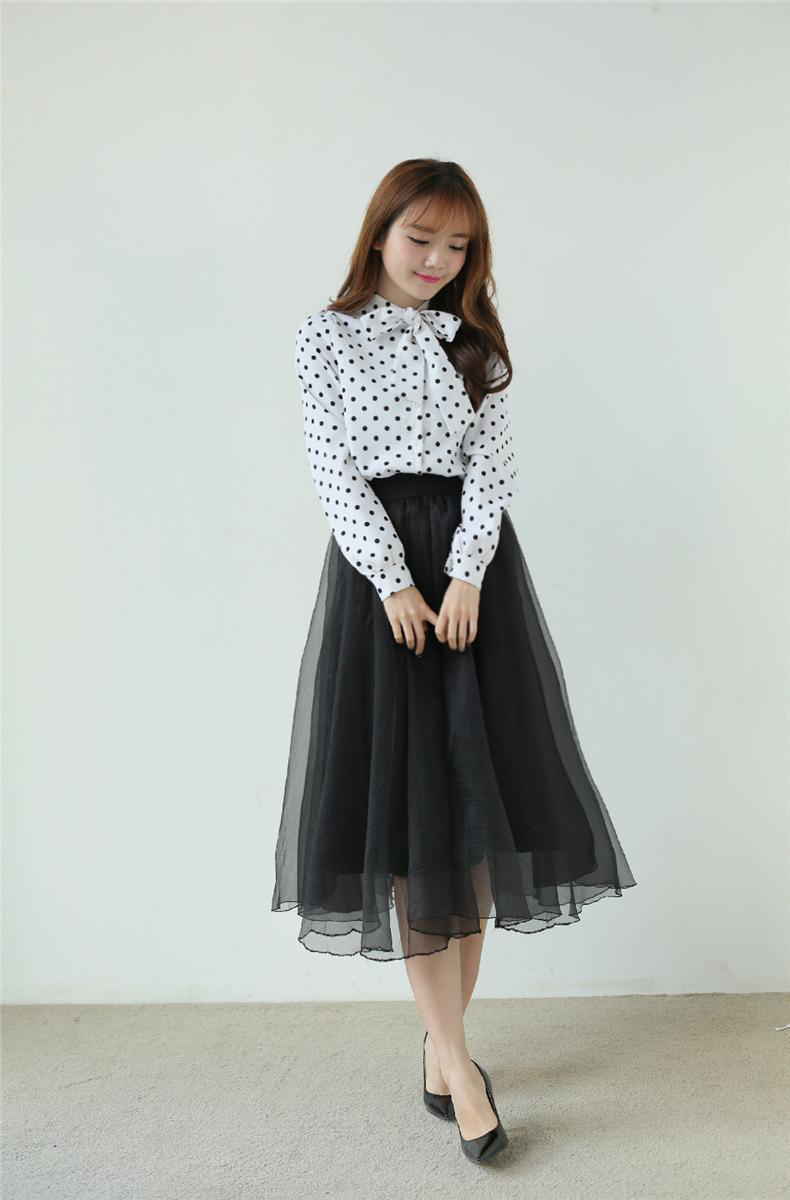

In [3]:
path = os.listdir(TRAIN_IMAGES_PATH)
a = np.random.randint(10000)
idx = path[a][:-4]

img_name = idx + '.jpg'
anno_name = idx + '.json'

img = Image.open(TRAIN_IMAGES_PATH + img_name)
with open(TRAIN_ANNO_PATH + anno_name) as f:
      data = json.load(f)

display(img)

In [4]:
print(data.keys())

dict_keys(['item2', 'source', 'pair_id', 'item1'])


In [5]:
item1 = data['item1'] 
seg1 = item1["segmentation"]
bbox1 = item1["bounding_box"]
category1 = item1['category_name']
segs1 = []
for i in range(len(seg1)):
    segs1.append(np.array(seg1[i]).reshape(-1,2))

In [6]:
segs2 = []
if 'item2' in data.keys():
    item2 = data['item2'] 
    seg2 = item2["segmentation"]
    bbox2 = item2["bounding_box"]
    category2 = item2['category_name']
    for i in range(len(seg2)):
        segs2.append(np.array(seg2[i]).reshape(-1,2))

In [7]:
items = []

items.append(segs1)
items.append(segs2)

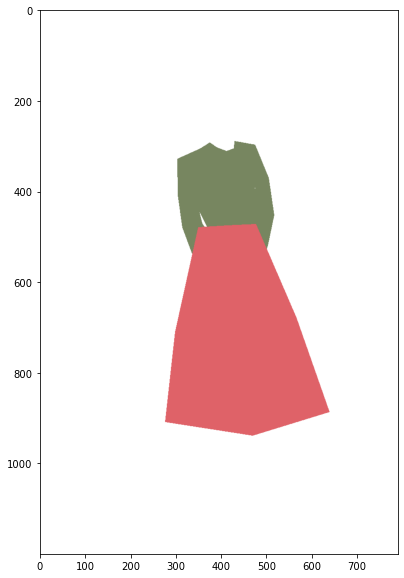

long sleeve top
skirt


In [8]:
canvas = np.ones((img.size[1], img.size[0],3), np.uint8)
canvas*=255
for segs in items:
    color = list(np.random.random(size=3) * 255)
    for i in segs:
        points = [(int(x[0]),int(x[1])) for x in i]
        pts = np.array([[x,y] for(x,y) in points])
        cv2.drawContours(canvas, [pts],-1, color, -1)
        
        
mask = Image.fromarray(canvas)
plt.figure(figsize=(10,10))
plt.imshow(mask)
plt.show()
print(category1)
print(category2)

In [9]:
def make_transparent(img):
    img.putalpha(128)
    img = img.convert("RGBA")
    datas = img.getdata()

    newData = []
    for item in datas:
        if item[0] == 255 and item[1] == 255 and item[2] == 255:
            newData.append((255, 255, 255, 0))
        else:
            newData.append(item)

    img.putdata(newData)
    return img

transparent = make_transparent(mask)

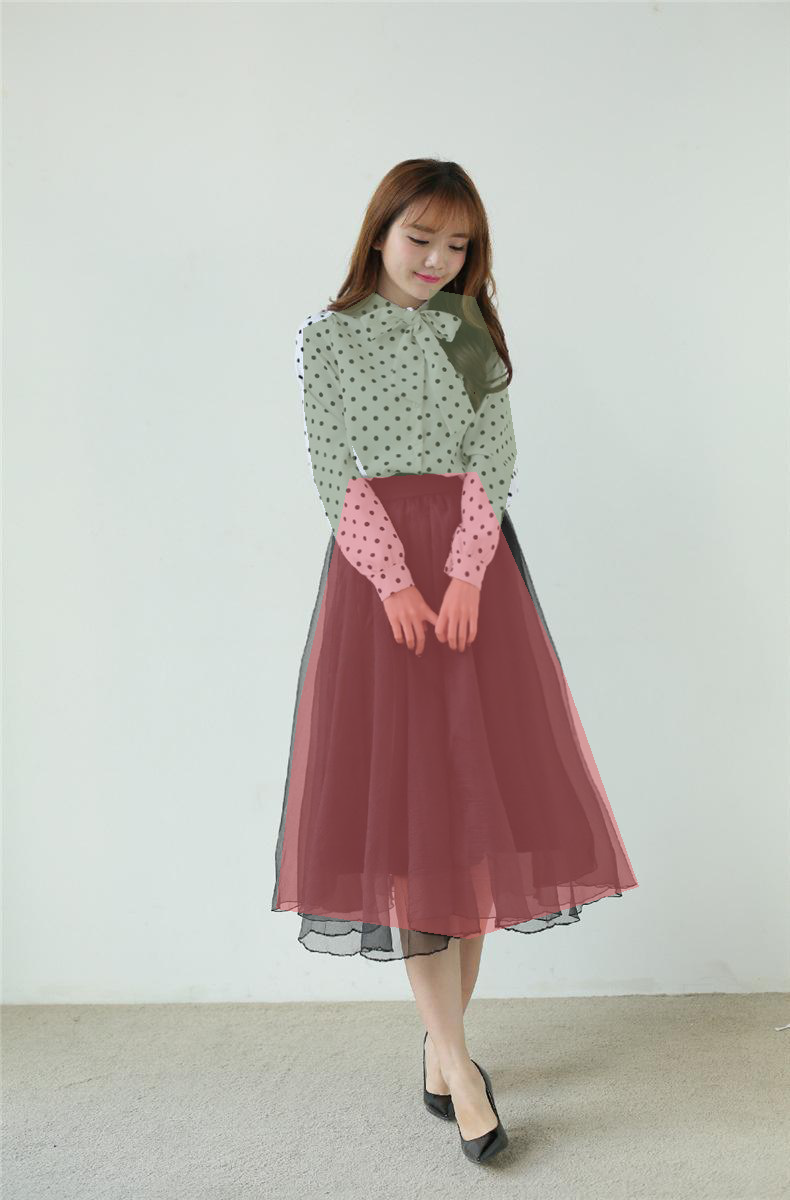

In [10]:
img1 = img.copy()
img1.paste(transparent, (0, 0), transparent)
display(img1)

In [11]:
print(data.keys())

dict_keys(['item2', 'source', 'pair_id', 'item1'])
